In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bat=pd.read_csv('../data/Batting.csv')
df_bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [4]:
df_bat2=df_bat.groupby('yearID').agg(ab=('AB','sum'),h=('H','sum')).reset_index()
df_bat2['hit_pct']=df_bat2['h']/df_bat2['ab']
df_bat2.head()

,yearID,ab,h,hit_pct
0,1871,10822,3101,0.286546
1,1872,15665,4467,0.285158
2,1873,16959,4926,0.290465
3,1874,19104,5224,0.273451
4,1875,26833,6812,0.253867


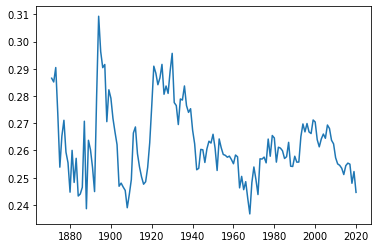

In [6]:
plt.plot(df_bat2.yearID,df_bat2.hit_pct)

In [12]:
df_trout=df_bat[df_bat['playerID']=='troutmi01']
df_trout['OBP']=(df_trout['H']+df_trout['BB']+df_trout['HBP'])/(df_trout['AB']+df_trout['BB']+df_trout['HBP']+df_trout['SF'])
df_trout['BA']=df_trout['H']/df_trout['AB']
df_trout.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA
95484,troutmi01,2011,1,LAA,AL,40,123,20,27,6,...,0.0,9,30.0,0.0,2.0,0.0,1.0,2.0,0.281481,0.219512
96904,troutmi01,2012,1,LAA,AL,139,559,129,182,27,...,5.0,67,139.0,4.0,6.0,0.0,7.0,7.0,0.399061,0.325581
98308,troutmi01,2013,1,LAA,AL,157,589,109,190,39,...,7.0,110,136.0,10.0,9.0,0.0,8.0,8.0,0.431564,0.322581
99744,troutmi01,2014,1,LAA,AL,157,602,115,173,39,...,2.0,83,184.0,6.0,10.0,0.0,10.0,6.0,0.377305,0.287375
101226,troutmi01,2015,1,LAA,AL,159,575,104,172,32,...,7.0,92,158.0,14.0,10.0,0.0,5.0,11.0,0.401760,0.299130


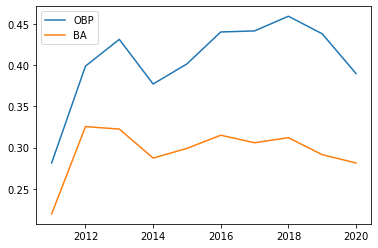

In [19]:
fig, ax = plt.subplots()
ax.plot(df_trout['yearID'],df_trout['OBP'],label='OBP')
ax.plot(df_trout['yearID'],df_trout['BA'],label='BA')
ax.legend()
